In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [3]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
28 * 28

784

In [5]:
type(df_train.values), df_train.values.shape

(numpy.ndarray, (60000, 785))

In [7]:
X_train = df_train.values[:, 1:] / 255 # min_max scaler
y_train = df_train.values[:, 0]

X_test = df_test.values[:, 1:] /255
y_test = df_test.values[:, 0]

In [18]:
x1 = tf.constant(3.0)
x2 = tf.constant(4.0)
y = x1 + x2
x1, x2, y

with tf.Session() as sess:
    y_ = sess.run(y)
y_

7.0

In [22]:
x1 = tf.placeholder(dtype=tf.float32, shape=())
x2 = tf.placeholder(dtype=tf.float32, shape=())
y = x1 + x2
x1, x2, y

print("x1", x1)
print("x2", x2)


with tf.Session() as sess:
    y_ = sess.run(y, feed_dict={x1: 4.5, x2: 9.0})
y_

x1 Tensor("Placeholder_6:0", shape=(), dtype=float32)
x2 Tensor("Placeholder_7:0", shape=(), dtype=float32)


13.5

In [50]:
x1 = tf.placeholder(dtype=tf.float32, shape=(3, 5))
x2 = tf.placeholder(dtype=tf.float32, shape=(1, 3))
y = tf.matmul(x2, x1)
x1, x2, y

print("x1", x1)
print("x2", x2)

with tf.Session() as sess:
    #a = np.array([4.0, 5.0, 9.0])
    b = np.array([[9.0, 1.0, 0.0]])
    values = {x1: a, x2: b}
    y_ = sess.run(y, feed_dict=values)
y_



x1 Tensor("Placeholder_36:0", shape=(3, 5), dtype=float32)
x2 Tensor("Placeholder_37:0", shape=(1, 3), dtype=float32)


array([[1.2017155, 8.085756 , 8.611088 , 1.8214232, 2.8426394]],
      dtype=float32)

In [48]:
a = np.random.random((3, 5))
a, b

(array([[0.13250416, 0.8097111 , 0.94832341, 0.18094663, 0.27355216],
        [0.00917814, 0.79835685, 0.07617629, 0.19290364, 0.38067005],
        [0.01696401, 0.04651614, 0.6001835 , 0.64205049, 0.10578734]]),
 array([[9., 1., 0.]]))

In [49]:
b.dot(a)

array([[1.20171556, 8.08575673, 8.61108702, 1.82142327, 2.84263946]])


Adavantages 
 - parallel 
 - runs on GPU for faster computation
 - has GAD optmizer for efficiently calculate the neural networks 
 - has its own optimizers ..my focus will be on the architecture .. help find optimized solutuon (back propagation)
 - Portable ... build in python and deploy on java eco system


In [91]:
X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
print("X", X)
print("y", y)


y_oh = tf.one_hot(y, depth= 10)
print("y_oh", y_oh)

W = tf.Variable(tf.truncated_normal(shape = (784, 10), stddev=0.1, seed = 1))
b = tf.Variable(tf.zeros(shape=(10, )))
print("W", W, "b", b)

Z = tf.matmul(X, W) + b # Z: net input function, logits
print("Z", Z)

y_pred = tf.argmax(Z, axis=1, output_type="int32")
print("y_pred", y_pred)

match = tf.equal(y, y_pred)
print("match", match)

accuracy = tf.reduce_mean(tf.cast(match, "float32"))
print("accuracy", accuracy)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits = Z)

print("Cross entropy loss", loss)

cost = tf.reduce_mean(loss)
print("Cost (J): ", cost)

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {X: X_train, y: y_train}
    
    scores = []
    for i in range(100): # Each iteration uses the whole training set
        accuracy_, cost_, _ = sess.run([accuracy, cost, optimizer], feed_dict=values)
        print(i, "accuracy_", accuracy_)
        scores.append({"cost": cost_, "accuracy": accuracy_})

X Tensor("Placeholder_78:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_79:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_7:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable_35:0' shape=(784, 10) dtype=float32_ref> b <tf.Variable 'Variable_36:0' shape=(10,) dtype=float32_ref>
Z Tensor("add_28:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_14:0", shape=(?,), dtype=int32)
match Tensor("Equal_13:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_16:0", shape=(), dtype=float32)
Cross entropy loss Tensor("softmax_cross_entropy_with_logits_7/Reshape_2:0", shape=(?,), dtype=float32)
Cost (J):  Tensor("Mean_17:0", shape=(), dtype=float32)
0 accuracy_ 0.123066664
1 accuracy_ 0.13385
2 accuracy_ 0.14776666
3 accuracy_ 0.16578333
4 accuracy_ 0.18658334
5 accuracy_ 0.2091
6 accuracy_ 0.23156667
7 accuracy_ 0.25586668
8 accuracy_ 0.27838334
9 accuracy_ 0.3025
10 accuracy_ 0.3244
11 accuracy_ 0.34581667
12 accuracy_ 0.36738333
13 accuracy_ 0.3882


KeyboardInterrupt: 

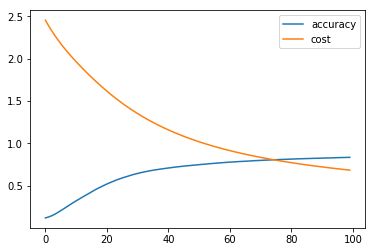

In [72]:
pd.DataFrame(scores).plot()

In [97]:
X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
print("X", X)
print("y", y)


y_oh = tf.one_hot(y, depth= 10)
print("y_oh", y_oh)

W = tf.Variable(tf.truncated_normal(shape = (784, 10), stddev=0.1, seed = 1))
b = tf.Variable(tf.zeros(shape=(10, )))
print("W", W, "b", b)

Z = tf.matmul(X, W) + b # Z: net input function, logits
print("Z", Z)

y_pred = tf.argmax(Z, axis=1, output_type="int32")
print("y_pred", y_pred)

match = tf.equal(y, y_pred)
print("match", match)

accuracy = tf.reduce_mean(tf.cast(match, "float32"))
print("accuracy", accuracy)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits = Z)

print("Cross entropy loss", loss)

cost = tf.reduce_mean(loss)
print("Cost (J): ", cost)

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {X: X_train, y: y_train}
    
    scores = []
    for i in range(10): # one epoch = one full pass over the training data
        
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        num_batches = math.ceil(len(X_train)/batch_size)
        for j in range(num_batches):
            start = j*batch_size
            batch = indices[start: start + batch_size]
            X_batch, y_batch = X_train[batch], y_train[batch]
            values = {X: X_batch, y: y_batch}
            accuracy_, cost_, _ = sess.run([accuracy, cost, optimizer], feed_dict=values)
            scores.append({"cost": cost_, "accuracy": accuracy_})
            
        print("epoch", i, "accuracy_", accuracy_)
    print("Test accuracy", sess.run([accuracy], feed_dict={X: X_test, y: y_test}))

X Tensor("Placeholder_86:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_87:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_11:0", shape=(?, 10), dtype=float32)
W <tf.Variable 'Variable_43:0' shape=(784, 10) dtype=float32_ref> b <tf.Variable 'Variable_44:0' shape=(10,) dtype=float32_ref>
Z Tensor("add_32:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_18:0", shape=(?,), dtype=int32)
match Tensor("Equal_17:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_24:0", shape=(), dtype=float32)
Cross entropy loss Tensor("softmax_cross_entropy_with_logits_11/Reshape_2:0", shape=(?,), dtype=float32)
Cost (J):  Tensor("Mean_25:0", shape=(), dtype=float32)
epoch 0 accuracy_ 0.84375
epoch 1 accuracy_ 0.96875
epoch 2 accuracy_ 0.9375
epoch 3 accuracy_ 0.96875
epoch 4 accuracy_ 0.9375
epoch 5 accuracy_ 0.9375
epoch 6 accuracy_ 0.96875
epoch 7 accuracy_ 1.0
epoch 8 accuracy_ 1.0
epoch 9 accuracy_ 0.875
Test accuracy [0.9275]


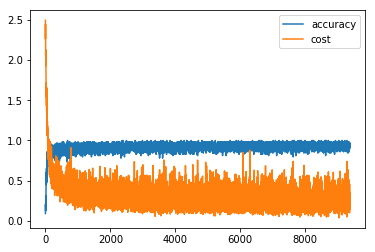

In [95]:
pd.DataFrame(scores).plot()

In [86]:
indices = np.arange(len(X_train))
np.random.shuffle(indices)
indices

array([59390,  5689, 12736, ...,  5596, 43090, 44280])

In [90]:
batch = indices[:32]
X_train[batch].shape

(32, 784)

In [84]:
import math

In [96]:
num_batches

938

In [99]:
X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
print("X", X)
print("y", y)


y_oh = tf.one_hot(y, depth= 10)
print("y_oh", y_oh)

W1 = tf.Variable(tf.truncated_normal(shape = (784, 400), stddev=0.1, seed = 1))
b1 = tf.Variable(tf.zeros(shape=(400, )))
print("W1", W1, "b1", b1)


Z1 = tf.matmul(X, W1) + b1 # Z: net input function, logits
A1 = tf.nn.relu(Z1)

W2 = tf.Variable(tf.truncated_normal(shape = (400, 10), stddev=0.1, seed = 1))
b2 = tf.Variable(tf.zeros(shape=(10, )))
print("W2", W2, "b2", b2)

Z = tf.matmul(A1, W2) + b2 # Z: net input function, logits
print("Z", Z)

y_pred = tf.argmax(Z, axis=1, output_type="int32")
print("y_pred", y_pred)

match = tf.equal(y, y_pred)
print("match", match)

accuracy = tf.reduce_mean(tf.cast(match, "float32"))
print("accuracy", accuracy)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits = Z)

print("Cross entropy loss", loss)

cost = tf.reduce_mean(loss)
print("Cost (J): ", cost)

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {X: X_train, y: y_train}
    
    scores = []
    for i in range(10): # one epoch = one full pass over the training data
        
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        num_batches = math.ceil(len(X_train)/batch_size)
        for j in range(num_batches):
            start = j*batch_size
            batch = indices[start: start + batch_size]
            X_batch, y_batch = X_train[batch], y_train[batch]
            values = {X: X_batch, y: y_batch}
            accuracy_, cost_, _ = sess.run([accuracy, cost, optimizer], feed_dict=values)
            scores.append({"cost": cost_, "accuracy": accuracy_})
            
        print("epoch", i, "accuracy_", accuracy_)
    print("Test accuracy", sess.run([accuracy], feed_dict={X: X_test, y: y_test}))

X Tensor("Placeholder_90:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_91:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_13:0", shape=(?, 10), dtype=float32)
W1 <tf.Variable 'Variable_49:0' shape=(784, 400) dtype=float32_ref> b1 <tf.Variable 'Variable_50:0' shape=(400,) dtype=float32_ref>
W2 <tf.Variable 'Variable_51:0' shape=(400, 10) dtype=float32_ref> b2 <tf.Variable 'Variable_52:0' shape=(10,) dtype=float32_ref>
Z Tensor("add_36:0", shape=(?, 10), dtype=float32)
y_pred Tensor("ArgMax_20:0", shape=(?,), dtype=int32)
match Tensor("Equal_19:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_28:0", shape=(), dtype=float32)
Cross entropy loss Tensor("softmax_cross_entropy_with_logits_13/Reshape_2:0", shape=(?,), dtype=float32)
Cost (J):  Tensor("Mean_29:0", shape=(), dtype=float32)
epoch 0 accuracy_ 0.96875
epoch 1 accuracy_ 1.0
epoch 2 accuracy_ 1.0
epoch 3 accuracy_ 1.0
epoch 4 accuracy_ 1.0
epoch 5 accuracy_ 1.0
epoch 6 accuracy_ 1.0
epoch 7 accuracy_ 1.0
epoch 8 accurac

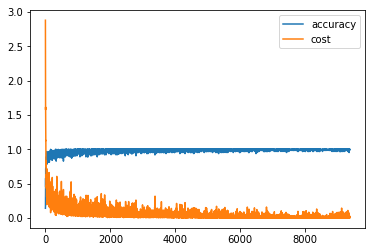

In [100]:
pd.DataFrame(scores).plot()

In [110]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [115]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
pd.DataFrame(Y_train).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [122]:
import keras
from keras.layers import Dense, InputLayer

In [116]:
model = keras.Sequential()
model.add(Dense(10, activation="softmax", input_shape = (784,)))
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"]
              , optimizer="adam")

model.fit(X_train, Y_train, epochs=4, batch_size=128, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
60000/60000 [==============================] - 2s 41us/step - loss: 0.6621 - acc: 0.8331
Epoch 2/4
60000/60000 [==============================] - 2s 39us/step - loss: 0.3605 - acc: 0.9029
Epoch 3/4
60000/60000 [==============================] - 2s 35us/step - loss: 0.3187 - acc: 0.9121
Epoch 4/4
60000/60000 [==============================] - 2s 35us/step - loss: 0.2990 - acc: 0.9166


In [117]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 0s 40us/step


[0.2846998196721077, 0.9198]

In [136]:
from time import time
tensord_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/%d" % time())

model = keras.Sequential()
model.add(InputLayer(input_shape = (784,)))
model.add(Dense(400, activation="relu"))
model.add(Dense(100, activation="relu")) # Dense 
model.add(Dense(100, activation="relu")) # Dense 
model.add(Dense(100, activation="relu")) # Dense 
model.add(Dense(100, activation="relu")) # Dense 
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"]
              , optimizer="adam")

model.fit(X_train
          , Y_train
          , validation_data=(X_test, Y_test)
          , epochs=4
          , batch_size=128, verbose=1
          , callbacks = [tensord_board]
         )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_19 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_20 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total para

In [121]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 1s 72us/step


[0.17090169300734998, 0.9505]

In [134]:
X = tf.placeholder("float32", (None, 784))
y = tf.placeholder("int32", (None,))
print("X", X)
print("y", y)


y_oh = tf.one_hot(y, depth= 10)
print("y_oh", y_oh)

W1 = tf.Variable(tf.truncated_normal(shape = (784, 400), stddev=0.1, seed = 1))
b1 = tf.Variable(tf.zeros(shape=(400, )))
print("W1", W1, "b1", b1)

Z1 = tf.matmul(X, W1) + b1 # Z: net input function, logits
A1 = tf.nn.relu(Z1)


W2 = tf.Variable(tf.truncated_normal(shape = (400, 100), stddev=0.1, seed = 1))
b2 = tf.Variable(tf.zeros(shape=(100, )))
print("W2", W2, "b2", b2)

Z2 = tf.matmul(A1, W2) + b2 
A2 = tf.nn.relu(Z2)


W3 = tf.Variable(tf.truncated_normal(shape = (100, 10), stddev=0.1, seed = 1))
b3 = tf.Variable(tf.zeros(shape=(10, )))
print("W3", W3, "b3", b3)

Z3 = tf.matmul(A2, W3) + b3 
A3 = tf.nn.relu(Z3)

Z = Z3

y_pred = tf.argmax(Z, axis=1, output_type="int32")
print("y_pred", y_pred)

match = tf.equal(y, y_pred)
print("match", match)

accuracy = tf.reduce_mean(tf.cast(match, "float32"))
print("accuracy", accuracy)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_oh, logits = Z)

print("Cross entropy loss", loss)

cost = tf.reduce_mean(loss)
print("Cost (J): ", cost)

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {X: X_train, y: y_train}
    
    scores = []
    for i in range(3): # one epoch = one full pass over the training data
        
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        num_batches = math.ceil(len(X_train)/batch_size)
        for j in range(num_batches):
            start = j*batch_size
            batch = indices[start: start + batch_size]
            X_batch, y_batch = X_train[batch], y_train[batch]
            values = {X: X_batch, y: y_batch}
            accuracy_, cost_, _ = sess.run([accuracy, cost, optimizer], feed_dict=values)
            scores.append({"cost": cost_, "accuracy": accuracy_})
            output = "%3d training acc: %0.4f" %(i, accuracy_) 
            print(output.ljust(150), end="\r")

        print("epoch", i, "accuracy_", accuracy_)
    print("Test accuracy", sess.run([accuracy], feed_dict={X: X_test, y: y_test}))

X Tensor("Placeholder_108:0", shape=(?, 784), dtype=float32)
y Tensor("Placeholder_109:0", shape=(?,), dtype=int32)
y_oh Tensor("one_hot_22:0", shape=(?, 10), dtype=float32)
W1 <tf.Variable 'Variable_101:0' shape=(784, 400) dtype=float32_ref> b1 <tf.Variable 'Variable_102:0' shape=(400,) dtype=float32_ref>
W2 <tf.Variable 'Variable_103:0' shape=(400, 100) dtype=float32_ref> b2 <tf.Variable 'Variable_104:0' shape=(100,) dtype=float32_ref>
W3 <tf.Variable 'Variable_105:0' shape=(100, 10) dtype=float32_ref> b3 <tf.Variable 'Variable_106:0' shape=(10,) dtype=float32_ref>
y_pred Tensor("ArgMax_29:0", shape=(?,), dtype=int32)
match Tensor("Equal_28:0", shape=(?,), dtype=bool)
accuracy Tensor("Mean_46:0", shape=(), dtype=float32)
Cross entropy loss Tensor("softmax_cross_entropy_with_logits_22/Reshape_2:0", shape=(?,), dtype=float32)
Cost (J):  Tensor("Mean_47:0", shape=(), dtype=float32)
epoch 0 accuracy_ 1.0000                                                                                  

In [138]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten

In [140]:
X_train_2d = X_train.reshape((-1, 28, 28, 1))
X_test_2d = X_test.reshape((-1, 28, 28, 1))
X_train_2d.shape, X_test_2d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [141]:
from time import time
tensord_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/%d" % time())

model = keras.Sequential()
model.add(InputLayer(input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(400, activation="relu"))
model.add(Dense(100, activation="relu")) 
model.add(Dense(10, activation="softmax"))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy
              , metrics=["accuracy"]
              , optimizer="adam")

model.fit(X_train_2d
          , Y_train
          , validation_data=(X_test_2d, Y_test)
          , epochs=4
          , batch_size=128, verbose=1
          , callbacks = [tensord_board]
         )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 400)               410000    
__________